### First Simple way to detect - Tukey Fences

Upper Inner Fence = 3rd Quartile + 1.5 * IQR 
Lower Inner Fence = 1st Quartile - 1.5 * IQR


Upper Outer Fence = 3rd Quartile + 3 * IQR 
Lower Outer Fence = 1st Quartile - 3 * IQR

Problem with this approach, this appraoch works because it makes assumptions about the data and assumes these values are highly unlikely but the data have to be normally distributed.

Also take Gimli from LotR (book uses this examples). In the fellowship, you have a group of small hobbts, and a group of tall men / elves. Gimli is is between. So outliers don't necessarily have to live at the edges

### Basic Premise of using knn for outlier detection -

Calculate all pairwise distances.
Then you keep only k closes neighbors

Inutitively, outliers shouldn't really remain in anyone's list of neighbors.

So if you picture nodes and edges where nodes are people or data points and then edges are what remain after you purne to only, outliers will be nodes in the graph will low indegree (low number of edges)


Author first starts by finding two people who aren't even in anyone's list even when doing a 20NN

so that's method # 1 - just lookin at how doesn't show up even with a larg ek

Problem with appraoch - kind of just randomly, should I look at 5NN, 10NN, 20NN. Even if you settle it, get a list of 2 where both don't have any edges, but who's more of an outlier.

Better appraoch - use k-distance or distance to the kth neighbor

This appraoch gives you a quantitaive measure where you can now compare those two points and see those two employees (will code below) have a much higher k-distance than huge drop off

Problem with this - similiar to Tukey fences, will find data points in boonies but what about data that is close to other points but still sits by itself in n-dimensional space


So instead you use this:
Local Outlier Factors

It essentially normalizes data to be around 1, so closer to 1 the more ordinary the point is As the score increases, point should b econsidered less typical and more like an outlier.

Unlike k-distance, 1 is typical does not change, regardless of graph which is really  nice

High - level:
You are an outlier if your k nearest neibhbors consider you farther away than their neighbors consider them.

So image you are a trailer living in a nice community.  Sure in k-distance you may be ranked closer than the trailer across town, but in all dimensions those uniform houses in that community will have such small distances to each other relative to you (thinking not just geographic distance but features of the house etc to get kNN distance) that you will get a really high score.

So essentially this punishes points that sit realtive close in k-dimensional space but still stand-alone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyod

In [2]:
excel_file_obj = pd.ExcelFile("../raw_data/SupportCenter.xlsx")
# Information on the type of offers
support_df = pd.read_excel(excel_file_obj, "SupportPersonnel", nrows=400)

In [3]:
support_df.tail()

,Employee ID,Avg Tix / Day,Customer rating,Tardies,Graveyard Shifts Taken,Weekend Shifts Taken,Sick Days Taken,% Sick Days Taken on Friday,Employee Dev. Hours,Shift Swaps Requested,Shift Swaps Offered
395,139820,162.6,3.373240,2,3,1,1,1.00,6,1,3
396,144780,159.6,3.504737,1,2,1,2,0.00,15,1,1
397,138420,155.4,4.285959,3,3,1,2,0.50,18,1,3
398,131547,150.7,3.986004,1,2,1,4,0.25,30,2,3
399,137942,160.6,3.874964,1,1,1,2,1.00,16,1,0


In [4]:
employees = support_df.loc[:, support_df.columns[1: ]].values

In [5]:
employees

array([[151.8       ,   3.32356152,   1.        , ...,   0.        ,
          2.        ,   1.        ],
       [155.2       ,   3.15791497,   1.        , ...,  12.        ,
          1.        ,   2.        ],
       [164.2       ,   3.99511402,   3.        , ...,  23.        ,
          2.        ,   0.        ],
       ...,
       [155.4       ,   4.28595931,   3.        , ...,  18.        ,
          1.        ,   3.        ],
       [150.7       ,   3.9860039 ,   1.        , ...,  30.        ,
          2.        ,   3.        ],
       [160.6       ,   3.87496423,   1.        , ...,  16.        ,
          1.        ,   0.        ]])

In [6]:
# First going to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
employees_standardized = scaler.fit_transform(employees)

### First, going to use k-distance to see what outliers I get - uses kdistance by default

In [7]:
from pyod.models.knn import KNN

In [8]:
kNN_model = KNN(n_neighbors=5)
kNN_model.fit(employees_standardized)

# get outlier scores of the training data
kdistance_scores = kNN_model.decision_scores_  # 

In [9]:
kdistance_scores

array([2.98891865, 1.8007078 , 2.55687172, 2.35736386, 3.10991605,
       2.23062177, 2.44747388, 1.73285562, 2.58721665, 2.89512884,
       2.03684618, 2.79606543, 2.094383  , 2.50719397, 2.4182019 ,
       1.95954878, 2.86216738, 2.12902367, 2.7692428 , 3.42804783,
       2.99473546, 2.36098362, 1.96929208, 3.54329015, 2.67310536,
       2.5877866 , 1.90251072, 2.77647929, 2.16663424, 1.94594685,
       2.41396908, 1.92576048, 2.22485828, 3.03245974, 2.18508345,
       3.34009471, 2.47215691, 2.23976422, 2.69467294, 3.11631179,
       2.53504765, 2.19786987, 1.97087039, 1.94574832, 1.8286518 ,
       2.18997718, 2.84542797, 2.56235941, 2.30962425, 2.36279583,
       2.1030892 , 2.38865316, 1.90141609, 2.0206367 , 2.24694639,
       2.20796553, 2.17276677, 2.8005614 , 3.2879249 , 1.54303893,
       2.42280549, 3.15037314, 2.63960055, 2.53068702, 1.87757321,
       2.12956244, 2.18769052, 2.42327513, 2.56914057, 2.01998552,
       2.26562535, 2.48508809, 2.27301472, 2.18997718, 2.00294

In [10]:
highest_scores = -np.sort(-kdistance_scores, )

In [11]:
highest_scores[0:5]

array([4.85142195, 4.32441788, 3.54329015, 3.42804783, 3.42680299])

In [12]:
# Let's check the ids
highest_emp_index = np.argwhere(kdistance_scores == highest_scores[0])[0][0]
second_highest_index = np.argwhere(kdistance_scores == highest_scores[1])[0][0]

In [13]:
support_df.iloc[highest_emp_index, :]

Employee ID                    143406.000000
Avg Tix / Day                     145.000000
Customer rating                     2.325385
Tardies                             3.000000
Graveyard Shifts Taken              1.000000
Weekend Shifts Taken                0.000000
Sick Days Taken                     6.000000
% Sick Days Taken on Friday         0.833333
Employee Dev. Hours                30.000000
Shift Swaps Requested               4.000000
Shift Swaps Offered                 0.000000
Name: 373, dtype: float64

In [14]:
support_df.iloc[second_highest_index, :]

Employee ID                    137155.000000
Avg Tix / Day                     165.300000
Customer rating                     4.493826
Tardies                             1.000000
Graveyard Shifts Taken              3.000000
Weekend Shifts Taken                2.000000
Sick Days Taken                     1.000000
% Sick Days Taken on Friday         0.000000
Employee Dev. Hours                30.000000
Shift Swaps Requested               1.000000
Shift Swaps Offered                 7.000000
Name: 298, dtype: float64

## Yes this checks out that these two have higher distance to kth neighbors than all the rest it was 3  and you can see the first one is highest and seems more like somone who is flying under the radar the second person seems to be an outlier ie a superstar

### Implementing Local Outlier Factors

In [15]:
from pyod.models.lof import LOF

In [16]:
LOF_model = LOF(n_neighbors=5)
LOF_model.fit(employees_standardized)

# get outlier scores of the training data
lof_scores = LOF_model.decision_scores_  # 

As you can see from the plot, hovers around one, may go a little below for those that really close to others, but will usually be greater, and the greater the worse

(array([148., 152.,  62.,  25.,   9.,   2.,   0.,   1.,   0.,   1.]),
 array([0.92538064, 1.03012057, 1.1348605 , 1.23960043, 1.34434036,
        1.44908029, 1.55382022, 1.65856015, 1.76330008, 1.86804001,
        1.97277994]),
 <a list of 10 Patch objects>)

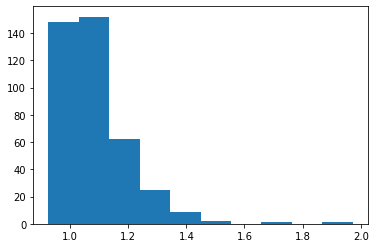

In [17]:
plt.hist(lof_scores)

In [18]:
highest_lof_scores = -np.sort(-lof_scores, )

In [19]:
highest_lof_scores[0:5]

array([1.97277994, 1.76310701, 1.47281707, 1.44998333, 1.44343772])

## Let's see the worst guy here

In [20]:
highest_lof_index = np.argwhere(lof_scores == highest_lof_scores[0])[0][0]
support_df.iloc[highest_emp_index, :]

Employee ID                    143406.000000
Avg Tix / Day                     145.000000
Customer rating                     2.325385
Tardies                             3.000000
Graveyard Shifts Taken              1.000000
Weekend Shifts Taken                0.000000
Sick Days Taken                     6.000000
% Sick Days Taken on Friday         0.833333
Employee Dev. Hours                30.000000
Shift Swaps Requested               4.000000
Shift Swaps Offered                 0.000000
Name: 373, dtype: float64

This tells you that this guy with a score of almost 2, neighbors view him as twice as far as others in the community.